In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import math
import random



In [2]:
#Sigmoid & its derivative
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

def sigmoid_derivative(output):
    return output * (1 - output)



In [3]:
#Binary Cross Entropy & its derivative
def binary_cross_entropy(y_true, y_pred):
    epsilon = 1e-8
    return -(y_true * math.log(y_pred + epsilon) + (1 - y_true) * math.log(1 - y_pred + epsilon))

def binary_cross_entropy_derivative(y_true, y_pred):
    epsilon = 1e-8
    return -(y_true / (y_pred + epsilon)) + ((1 - y_true) / (1 - y_pred + epsilon))




In [4]:
#MLP with 1 hidden layer
class MLP:
    def __init__(self, input_size, hidden_size):
        self.hidden_size = hidden_size
        self.weights_input_hidden = [[random.uniform(-1, 1) for _ in range(input_size)] for _ in range(hidden_size)]
        self.bias_hidden = [random.uniform(-1, 1) for _ in range(hidden_size)]
        self.weights_hidden_output = [random.uniform(-1, 1) for _ in range(hidden_size)]
        self.bias_output = random.uniform(-1, 1)

    def forward(self, inputs):
        self.hidden_input = []
        self.hidden_output = []
        for i in range(self.hidden_size):
            z = sum(inputs[j] * self.weights_input_hidden[i][j] for j in range(len(inputs))) + self.bias_hidden[i]
            self.hidden_input.append(z)
            self.hidden_output.append(sigmoid(z))
        z_out = sum(self.hidden_output[i] * self.weights_hidden_output[i] for i in range(self.hidden_size)) + self.bias_output
        self.output = sigmoid(z_out)
        return self.output

    def backward(self, inputs, target, learning_rate):
        d_loss_output = binary_cross_entropy_derivative(target, self.output)
        d_output = sigmoid_derivative(self.output)
        delta_output = d_loss_output * d_output
        delta_hidden = []
        for i in range(self.hidden_size):
            d_hidden = sigmoid_derivative(self.hidden_output[i])
            delta_hidden.append(delta_output * self.weights_hidden_output[i] * d_hidden)
        for i in range(self.hidden_size):
            self.weights_hidden_output[i] -= learning_rate * delta_output * self.hidden_output[i]
        self.bias_output -= learning_rate * delta_output
        for i in range(self.hidden_size):
            for j in range(len(inputs)):
                self.weights_input_hidden[i][j] -= learning_rate * delta_hidden[i] * inputs[j]
            self.bias_hidden[i] -= learning_rate * delta_hidden[i]



In [5]:
#Training function
def train(model, X, y, epochs=100, batch_size=10, learning_rate=0.1):
    losses = []
    for epoch in range(epochs):
        batch_losses = []
        for i in range(0, len(X), batch_size):
            X_batch = X[i:i+batch_size]
            y_batch = y[i:i+batch_size]
            for xi, yi in zip(X_batch, y_batch):
                output = model.forward(xi.tolist())
                loss = binary_cross_entropy(yi, output)
                batch_losses.append(loss)
                model.backward(xi.tolist(), yi, learning_rate)
        avg_loss = sum(batch_losses) / len(batch_losses)
        losses.append(avg_loss)
        print(f"Epoch {epoch+1}/{epochs} - Loss: {avg_loss:.4f}")
    return losses



In [6]:
#Decision boundary plot
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    Z = []
    for xi, yi in zip(xx.ravel(), yy.ravel()):
        pred = model.forward([xi, yi])
        Z.append(pred)
    Z = np.array(Z).reshape(xx.shape)
    plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], alpha=0.6, cmap=plt.cm.RdBu)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1)
    plt.title("Decision Boundary")
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.show()



In [7]:
#Generate dataset
X, y = make_moons(n_samples=200, noise=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



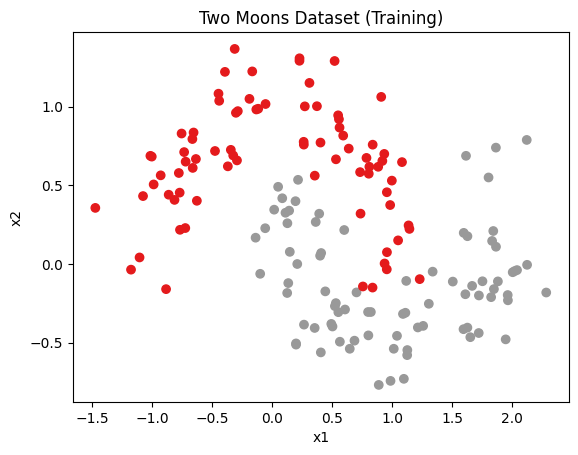

In [8]:
#Visualize dataset
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Set1)
plt.title("Two Moons Dataset (Training)")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()



In [9]:
#Initialize and train model
mlp = MLP(input_size=2, hidden_size=4)
losses = train(mlp, X_train, y_train, epochs=100, batch_size=10, learning_rate=0.1)



Epoch 1/100 - Loss: 0.7404
Epoch 2/100 - Loss: 0.6549
Epoch 3/100 - Loss: 0.5405
Epoch 4/100 - Loss: 0.4444
Epoch 5/100 - Loss: 0.3934
Epoch 6/100 - Loss: 0.3668
Epoch 7/100 - Loss: 0.3524
Epoch 8/100 - Loss: 0.3446
Epoch 9/100 - Loss: 0.3405
Epoch 10/100 - Loss: 0.3383
Epoch 11/100 - Loss: 0.3372
Epoch 12/100 - Loss: 0.3365
Epoch 13/100 - Loss: 0.3360
Epoch 14/100 - Loss: 0.3356
Epoch 15/100 - Loss: 0.3352
Epoch 16/100 - Loss: 0.3347
Epoch 17/100 - Loss: 0.3343
Epoch 18/100 - Loss: 0.3338
Epoch 19/100 - Loss: 0.3333
Epoch 20/100 - Loss: 0.3327
Epoch 21/100 - Loss: 0.3321
Epoch 22/100 - Loss: 0.3315
Epoch 23/100 - Loss: 0.3309
Epoch 24/100 - Loss: 0.3303
Epoch 25/100 - Loss: 0.3296
Epoch 26/100 - Loss: 0.3289
Epoch 27/100 - Loss: 0.3283
Epoch 28/100 - Loss: 0.3276
Epoch 29/100 - Loss: 0.3270
Epoch 30/100 - Loss: 0.3264
Epoch 31/100 - Loss: 0.3257
Epoch 32/100 - Loss: 0.3251
Epoch 33/100 - Loss: 0.3245
Epoch 34/100 - Loss: 0.3238
Epoch 35/100 - Loss: 0.3232
Epoch 36/100 - Loss: 0.3225
E

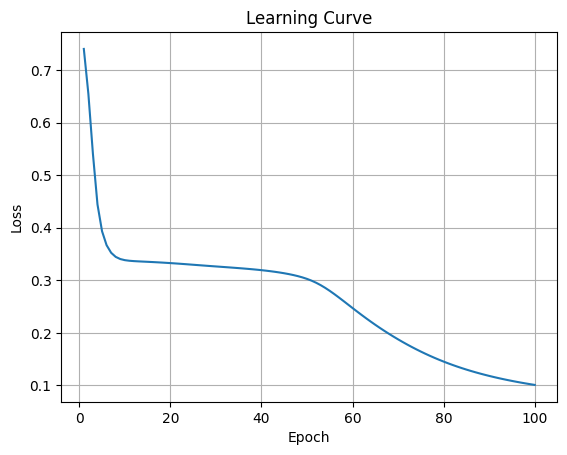

In [10]:
#Plot learning curve
plt.plot(range(1, len(losses)+1), losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Learning Curve")
plt.grid(True)
plt.show()



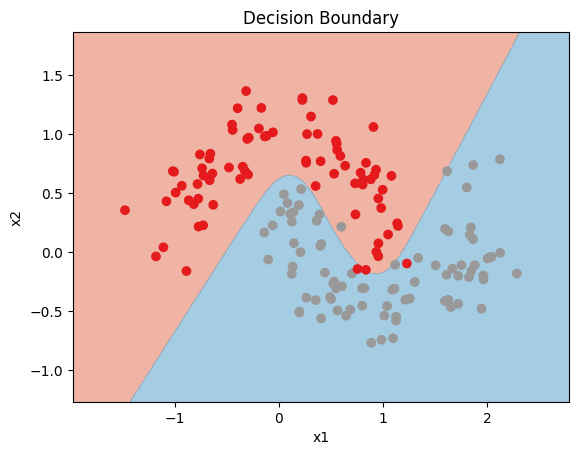

In [11]:
#Plot decision boundary
plot_decision_boundary(mlp, X_train, y_train)